### 1. Implementing modified K-means clustering algorithm

In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import networkx as nx

# Function to implement the elbow method
def elbow_method(data, max_clusters=10):
    inertias = []
    silhouette_scores = []
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters+1), inertias)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method (Inertia)')

    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_clusters+1), silhouette_scores)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Elbow Method (Silhouette Score)')

    plt.show()

# Function to preprocess the data
def preprocess_data(data):
    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    data_num = data.select_dtypes(include=['float64', 'int64'])
    data_num = imputer.fit_transform(data_num)

    data_cat = data.select_dtypes(include=['object'])
    data_cat = pd.DataFrame(data_cat.values, columns=data_cat.columns, dtype='category')

    data_preprocessed = pd.concat([pd.DataFrame(data_num, columns=data_num.columns), data_cat], axis=1)

    # Normalize numerical features
    scaler = StandardScaler()
    data_preprocessed[data_num.columns] = scaler.fit_transform(data_preprocessed[data_num.columns])

    return data_preprocessed

# Function to convert the "relation.doc" dataset to a graph representation
def convert_to_graph(data):
    # Create a graph using NetworkX
    graph = nx.Graph()

    # Add nodes representing individuals
    individuals = data['From'].unique().tolist() + data['To'].unique().tolist()
    individuals = list(set(individuals))  # Remove duplicates
    graph.add_nodes_from(individuals)

    # Add weighted edges representing transactions
    for _, row in data.iterrows():
        from_node = row['From']
        to_node = row['To']
        amount = row['Amount']
        graph.add_edge(from_node, to_node, weight=amount)

    return graph

# Function to apply the modified K-means algorithm
def modified_kmeans(data, max_clusters=10):
    elbow_method(data, max_clusters)
    optimal_k = int(input("Enter the optimal number of clusters: "))
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(data)
    return kmeans.labels_

### 2. Applying to the synthetic control dataset

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Helper function to preprocess data
def preprocess_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

# Function to apply modified K-means algorithm
def modified_kmeans(data, max_clusters=10):
    # Applying elbow method internally to choose optimal K
    wcss = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    # Determine the optimal number of clusters based on elbow method
    k_diffs = np.diff(wcss, 2)
    optimal_k = np.argmin(k_diffs) + 3  # adjust index due to diff

    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    labels = kmeans.fit_predict(data)
    return labels, optimal_k

# Load the data
file_path = '/content/synthetic_control.data'
synthetic_data = pd.read_csv(file_path, header=None, delim_whitespace=True)

# Assuming data does not need to be reshaped or reformatted beyond numeric standardization
synthetic_data_preprocessed = preprocess_data(synthetic_data)

# Apply the modified K-means algorithm to the synthetic control dataset
synthetic_labels, optimal_k = modified_kmeans(synthetic_data_preprocessed)

# Creating ground truth labels
ground_truth = np.array([i // 100 for i in range(600)])  # 600 samples, 100 each class

# Evaluate the algorithm against the ground truth
ari = adjusted_rand_score(ground_truth, synthetic_labels)
nmi = normalized_mutual_info_score(ground_truth, synthetic_labels)

print(f"Optimal K chosen: {optimal_k}")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal K chosen: 8
Adjusted Rand Index (ARI): 0.6702
Normalized Mutual Information (NMI): 0.7722


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


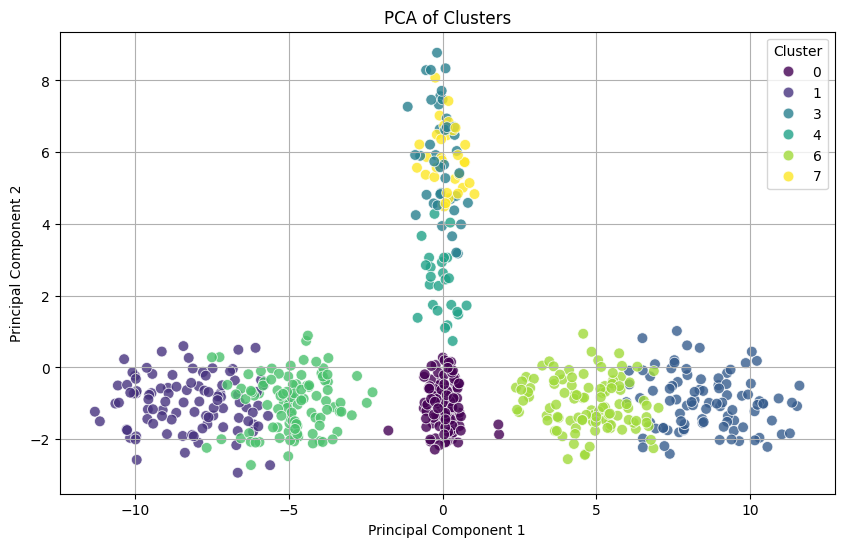

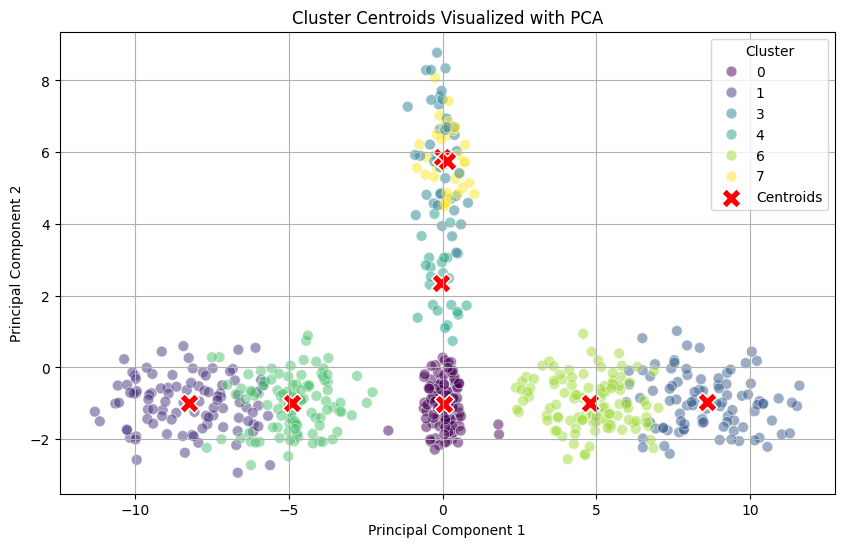

Adjusted Rand Index (ARI): 0.6702
Normalized Mutual Information (NMI): 0.7722


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
file_path = '/content/synthetic_control.data'  # Update the path accordingly
data = pd.read_csv(file_path, header=None, delim_whitespace=True)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Assuming you have already determined the optimal number of clusters
optimal_k = 8  # This should be set based on your previous results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(data_scaled)

# Apply PCA for dimensionality reduction for better visualization
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)

# Visualizing the clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_reduced[:, 0], y=data_reduced[:, 1], hue=labels, palette="viridis", s=60, alpha=0.8)
plt.title('PCA of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

# Analyzing cluster centroids
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_reduced[:, 0], y=data_reduced[:, 1], hue=labels, palette="viridis", s=60, alpha=0.5)
sns.scatterplot(x=centroids_pca[:, 0], y=centroids_pca[:, 1], color='red', s=200, label='Centroids', marker='X')
plt.title('Cluster Centroids Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

# Evaluation using ground truth labels if available
# Assuming you have ground truth labels
ground_truth = np.array([i // 100 for i in range(600)])  # This depends on the dataset specifics
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
ari = adjusted_rand_score(ground_truth, labels)
nmi = normalized_mutual_info_score(ground_truth, labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")


### 3. Now working with relation.doc

In [55]:
import re
import pandas as pd
from docx import Document

def parse_transactions(doc_path):
    doc = Document(doc_path)
    transactions = []
    pattern = r'\[\d+,\]\s*(\d+)\s+(\d+\.?\d*)\s+(\d+)\s+(\d+)'

    for para in doc.paragraphs:
        matches = re.findall(pattern, para.text)
        for match in matches:
            id, amount, frm, to = match
            transactions.append({
                'Id': int(id),
                'Amount': float(amount),
                'From': int(frm),
                'To': int(to)
            })

    return pd.DataFrame(transactions)

# Path to your document
doc_path = '/content/relation.docx'
df = parse_transactions(doc_path)

# Print the DataFrame to verify
print(df)

# Optionally, save to CSV
df.to_csv('transactions.csv', index=False)


        Id  Amount  From  To
0        1   192.4    58  31
1        2    88.9    43  63
2        3   192.4    58  61
3        4   300.5    93  88
4        5   195.5    58  38
...    ...     ...   ...  ..
5995  5996   284.8    84  18
5996  5997   305.0    43  63
5997  5998   116.2    70  94
5998  5999   301.9    46  30
5999  6000   107.8    70  94

[6000 rows x 4 columns]


In [56]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame loaded from the CSV
df = pd.read_csv('transactions.csv')

# Features for each individual
# Sum of amounts sent and received
total_sent = df.groupby('From')['Amount'].sum().rename('Total_Sent')
total_received = df.groupby('To')['Amount'].sum().rename('Total_Received')

# Frequency of transactions involved in (both sent and received)
freq_sent = df['From'].value_counts().rename('Freq_Sent')
freq_received = df['To'].value_counts().rename('Freq_Received')

# Merge all features into a single DataFrame
features = pd.concat([total_sent, total_received, freq_sent, freq_received], axis=1).fillna(0)

# Additional metrics could include mean transaction amounts, etc.
features['Avg_Sent'] = df.groupby('From')['Amount'].mean().fillna(0)
features['Avg_Received'] = df.groupby('To')['Amount'].mean().fillna(0)

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Ready for clustering
features_df = pd.DataFrame(features_scaled, index=features.index, columns=features.columns)
print(features_df.head())


    Total_Sent  Total_Received  Freq_Sent  Freq_Received  Avg_Sent  \
16    0.178804       -1.524243   0.179651      -1.523019 -0.743518   
40    0.185485        0.812284   0.179651       0.812277  2.105978   
43    0.179476       -0.350803   0.179651      -0.355371 -0.456859   
46    4.305333       -1.524243   4.311614      -1.523019 -0.802013   
58    4.832499       -1.524243   4.828109      -1.523019 -0.318602   

    Avg_Received  
16           NaN  
40     -0.090838  
43      0.768366  
46           NaN  
58           NaN  


In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load your DataFrame
df = pd.read_csv('transactions.csv')

# Feature aggregation
total_sent = df.groupby('From')['Amount'].sum().rename('Total_Sent')
total_received = df.groupby('To')['Amount'].sum().rename('Total_Received')
freq_sent = df['From'].value_counts().rename('Freq_Sent')
freq_received = df['To'].value_counts().rename('Freq_Received')
avg_sent = df.groupby('From')['Amount'].mean().rename('Avg_Sent')
avg_received = df.groupby('To')['Amount'].mean().rename('Avg_Received')

# Combine features into a single DataFrame
features = pd.DataFrame({
    'Total_Sent': total_sent,
    'Total_Received': total_received,
    'Freq_Sent': freq_sent,
    'Freq_Received': freq_received,
    'Avg_Sent': avg_sent,
    'Avg_Received': avg_received
}).fillna(0)  # Fill NaN with 0

# Normalize features
scaler = MinMaxScaler()  # Using Min-Max scaling this time for a [0, 1] range
features_scaled = scaler.fit_transform(features)

# Create a DataFrame from the scaled features
features_df = pd.DataFrame(features_scaled, columns=features.columns)

# Display the first few rows to check the outcome
print(features_df.head())


   Total_Sent  Total_Received  Freq_Sent  Freq_Received  Avg_Sent  \
0         0.0        0.666480        0.0       0.666667       0.0   
1         0.0        0.334218        0.0       0.333333       0.0   
2         0.0        0.667834        0.0       0.666667       0.0   
3         0.0        0.338350        0.0       0.333333       0.0   
4         0.0        0.333866        0.0       0.333333       0.0   

   Avg_Received  
0      0.982530  
1      0.985415  
2      0.984526  
3      0.997597  
4      0.984376  


### 4. Implementing Modified K-means on the relation dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal K chosen based on Silhouette Score: 6
Best Silhouette Score: 0.9639


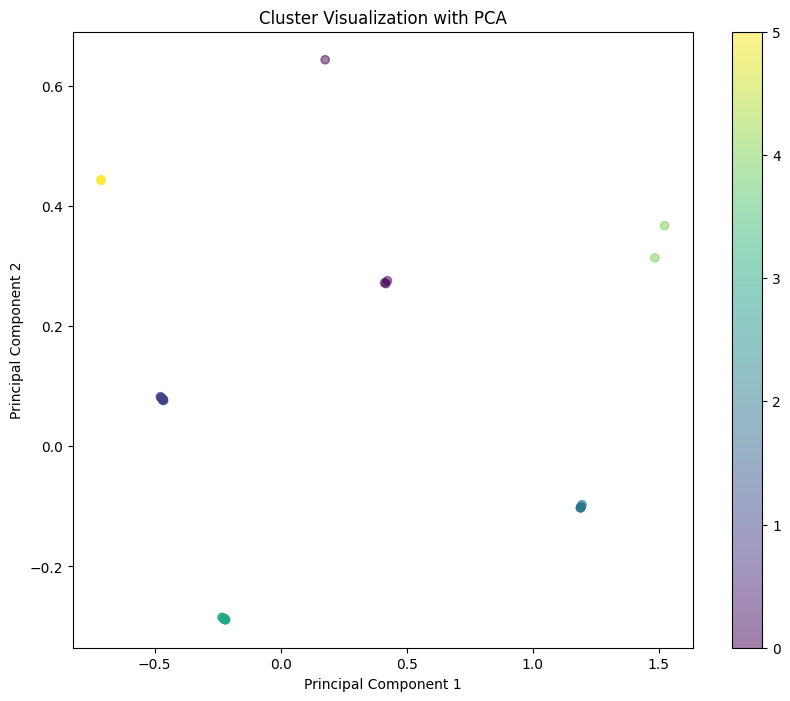

Cluster centroids:
          Total_Sent  Total_Received  Freq_Sent  Freq_Received  Avg_Sent  \
Cluster                                                                   
0          0.100474        0.417213       0.10       0.416667  0.993809   
1          0.000000        0.668342       0.00       0.666667  0.000000   
2          0.100029        0.000000       0.10       0.000000  0.989411   
3          0.000000        0.334274       0.00       0.333333  0.000000   
4          0.949013        0.000000       0.95       0.000000  0.988040   
5          0.000000        0.999745       0.00       1.000000  0.000000   

         Avg_Received  
Cluster                
0            0.983976  
1            0.985276  
2            0.000000  
3            0.985579  
4            0.000000  
5            0.982555  


In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load your DataFrame
df = pd.read_csv('transactions.csv')

# Feature aggregation
total_sent = df.groupby('From')['Amount'].sum().rename('Total_Sent')
total_received = df.groupby('To')['Amount'].sum().rename('Total_Received')
freq_sent = df['From'].value_counts().rename('Freq_Sent')
freq_received = df['To'].value_counts().rename('Freq_Received')
avg_sent = df.groupby('From')['Amount'].mean().rename('Avg_Sent')
avg_received = df.groupby('To')['Amount'].mean().rename('Avg_Received')

# Combine features into a single DataFrame
features = pd.DataFrame({
    'Total_Sent': total_sent,
    'Total_Received': total_received,
    'Freq_Sent': freq_sent,
    'Freq_Received': freq_received,
    'Avg_Sent': avg_sent,
    'Avg_Received': avg_received
}).fillna(0)

# Normalize features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
features_df = pd.DataFrame(features_scaled, columns=features.columns)

# Function to apply modified K-means algorithm
def modified_kmeans(data, max_clusters=10):
    wcss = []
    sil_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
        labels = kmeans.labels_
        sil_scores.append(silhouette_score(data, labels))

    optimal_k = np.argmax(sil_scores) + 2  # Determining the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    labels = kmeans.fit_predict(data)
    return labels, optimal_k, max(sil_scores)

# Applying the modified K-means algorithm
labels, optimal_k, max_silhouette = modified_kmeans(features_df)

print(f"Optimal K chosen based on Silhouette Score: {optimal_k}")
print(f"Best Silhouette Score: {max_silhouette:.4f}")

# Append cluster labels to the DataFrame
features_df['Cluster'] = labels

# Plotting the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
principal_components = pca.fit_transform(features_df.drop('Cluster', axis=1))

plt.figure(figsize=(10, 8))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=features_df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

# Analyzing cluster centroids
centroids = features_df.groupby('Cluster').mean()
print("Cluster centroids:\n", centroids)
